Pooja Umathe

Creating a multi-class prediction model to predict the species of plant which will survive in the neighborhood of a given environment.Creating key segments for all the plants (train + test) based on the average sunlight received throughout the day and their distance from waterbody to identify which segments of plants are getting enough sunlight and water vs which ones are not. This will help in mobilizing resources to track growth of trees appropriately. 

In [1]:
#Importing all relevant libraries

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the Datasets 

In [3]:
train = pd.read_csv("capstone_train.csv")
test = pd.read_csv("capstone_test.csv")
dictionary = pd.read_csv("Capstone Data Dictonary.csv")

## 1) Exploratory Data Analysis

In [4]:
# Showing first 5 rows from train dataset
train.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine


In [5]:
#Getting the shape

print(train.shape)

(464809, 13)


Train dataset comprises of 464809 observations and 13 characteristics.
Out of which one is dependent variable (Plant_Type) and rest 12 are independent variables.

In [6]:
# Getting all column names 
train.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Plant_Type'],
      dtype='object')

In [7]:
#Showing test data head
test.head(3)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine


In [8]:
# Printing last 3 rows from train data
train.tail(3)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
464806,3155,63,6,313,42,3804,226,227.0,135,3305,29,1,Ascomoid
464807,2813,200,12,201,22,2014,215,NaN,168,2151,26,3,Assassin vine
464808,2774,187,22,470,38,1284,217,250.0,156,787,13,3,Assassin vine


In [9]:
# Printing Data dictionary
dictionary

,Attribute,Definition
0,Height_From_Sea_Level,Height in meters with respect to sea level
1,Aspect,Angle Measured from True North
2,Slope,slope of the given tree
3,Distance_To_Water_Source,Distance to nearest water body/source
4,Standing_Distance_To_Water_Source,Perpendicular Distance to nearest water body/s...
5,Distance_To_Road,Distance to nearest road
6,Shadow_In_Morning,Shadow index in Morning ( Highest index value ...
7,Shadow_In_Midday,Shadow index in Midday( Highest index value wi...
8,Shadow_In_Evening,Shadow index in evening ( Highest index value ...
9,Distance_To_Fire,Distance to nearest fire ignition place


In [10]:
# Getting data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464809 non-null int64
Aspect                               464809 non-null int64
Slope                                464809 non-null int64
Distance_To_Water_Source             464809 non-null int64
Standing_Distance_To_Water_Source    464809 non-null int64
Distance_To_Road                     464809 non-null int64
Shadow_In_Morning                    464809 non-null int64
Shadow_In_Midday                     371776 non-null float64
Shadow_In_Evening                    464809 non-null int64
Distance_To_Fire                     464809 non-null int64
Turf                                 464809 non-null int64
Neighbourhood_Type                   464809 non-null int64
Plant_Type                           464809 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 46.1+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116203 entries, 0 to 116202
Data columns (total 13 columns):
Heigh_From_Sea_Level                 116203 non-null int64
Aspect                               116203 non-null int64
Slope                                116203 non-null int64
Distance_To_Water_Source             116203 non-null int64
Standing_Distance_To_Water_Source    116203 non-null int64
Distance_To_Road                     116203 non-null int64
Shadow_In_Morning                    116203 non-null int64
Shadow_In_Midday                     93124 non-null float64
Shadow_In_Evening                    116203 non-null int64
Distance_To_Fire                     116203 non-null int64
Turf                                 116203 non-null int64
Neighbourhood_Type                   116203 non-null int64
Plant_Type                           116203 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 11.5+ MB


In [12]:
# Describing variables for better understanding

train.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,371776.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.311841,142.518338,1980.473990,24.370455,2.113563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,19.744363,38.273670,1325.289344,9.478907,1.061051
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE933AB648>,
      dtype=object)

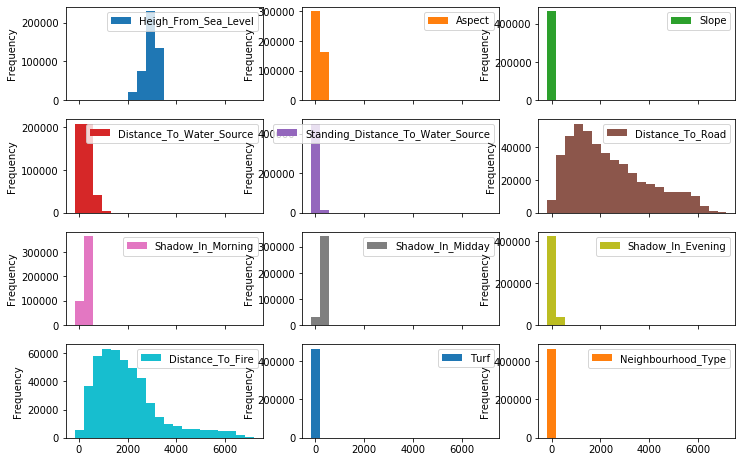

In [13]:
# Plotting distribution of each variable 

train.plot.hist(subplots=True, layout=(5,3), figsize=(12, 10), bins=20)

In [14]:
# Getting unique values from plant_type

train.Plant_Type.unique()

array(['Assassin vine', 'Ascomoid', 'Basidirond', 'Kelpie', 'Myconid:',
       'Hangman tree', 'Dark tree'], dtype=object)

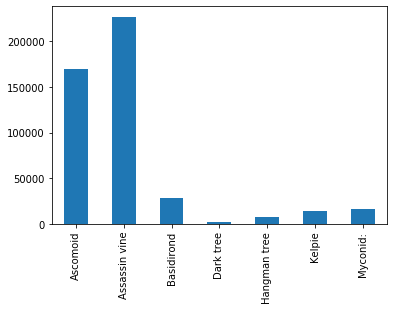

In [15]:
# Plotting bar plot of all unique values distribution in Plant_type

train['Plant_Type'].value_counts().sort_index().plot.bar()

In [16]:
# Fining unique values in Neighbourhood_type

train.Neighbourhood_Type.unique()

array([1, 3, 2, 4], dtype=int64)

So, here we can see that there are 7 unique values means there are 7 types of Plant_Type.
Also, we can see that there are just 4 Neighbourhood_Type.

In [17]:
# Value counts in Plant_Type

train.Plant_Type.value_counts()

Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid:          16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64

In [18]:
# Value Counts in Neighbourhood_Type

train.Neighbourhood_Type.value_counts()

1    208793
3    202660
4     29459
2     23897
Name: Neighbourhood_Type, dtype: int64

From the value counts we can see there are very less Dark tree Plant_Type and only few observations made for 4 and 2 Neighbourhood_Type.

## 2) Data Preprocessing

### Checking missing values

In [19]:
print(train.isna().sum())
print("There are ",train.Shadow_In_Midday.isna().sum() ,"missing values in Shadow_In_Midday of train dataset")

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64
There are  93033 missing values in Shadow_In_Midday of train dataset


In [20]:
print(test.isna().sum())
print("There are ",test.Shadow_In_Midday.isna().sum() ,"missing values in Shadow_In_Midday of test dataset")

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     23079
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64
There are  23079 missing values in Shadow_In_Midday of test dataset


There are so many missing values in Shadow_In_Midday column which is not good for training the model and predictions. Let's check how that column looks like;

In [21]:
print(train.Shadow_In_Midday.head(10))
print(train.Shadow_In_Midday.dtype)

0    224.0
1    224.0
2    244.0
3    243.0
4    238.0
5    234.0
6    244.0
7    202.0
8    200.0
9    246.0
Name: Shadow_In_Midday, dtype: float64
float64


In this case interpolation is the best thing to do. This method is to replace missing values with best guessing values.

In [22]:
train['Shadow_In_Midday'] = train.Shadow_In_Midday.interpolate(method ='linear')
print(train.isna().sum())

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64


In [23]:
test['Shadow_In_Midday'] = test.Shadow_In_Midday.interpolate(method ='linear')
print(test.isna().sum())

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64


Now, we have removed all null values or we can say that we have interpolate specific column which had null values. 
Let's check the correlation between all variables for better understanding.

But, our dependent variable is Plant_Type and it's in all text so to getting the correlation between all variables with Plant_Type we need to convert it into labels.
For that let's use label encoderusing scikit-learn library.

In [24]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
train['plant_type_labels'] = labelencoder.fit_transform(train['Plant_Type'])
train.head(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type,plant_type_labels
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine,1
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine,1
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid,0
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine,1
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine,1


Perfect!!
We have converted plant type names into labels.

In [25]:
# If we want to know what labels are addressed to what plant_type

label_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(label_name_mapping)

{'Ascomoid': 0, 'Assassin vine': 1, 'Basidirond': 2, 'Dark tree': 3, 'Hangman tree': 4, 'Kelpie': 5, 'Myconid:': 6}


Let's create new dataframe without original Plant_Type column.

In [26]:
df = train.drop(['Plant_Type'], axis=1)
df.head(4)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,plant_type_labels
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,1
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,1
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,0
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,1


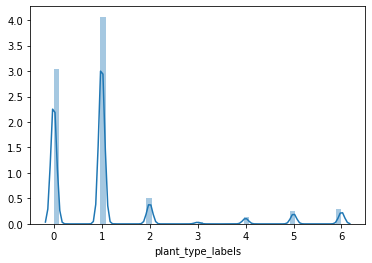

In [27]:
# Getting the distribution of each label in plant_type column

sns.distplot(df.plant_type_labels)

### Finding Correlation between all variables

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,plant_type_labels
Heigh_From_Sea_Level,1,0.0160353,-0.241253,0.306403,0.0939033,0.365264,0.11143,0.173859,0.0588548,0.147503,0.688972,-0.313981,-0.26951
Aspect,0.0160353,1,0.0788737,0.0180789,0.0706502,0.0242812,-0.579443,0.282509,0.646862,-0.108466,0.00801303,0.139175,0.0166931
Slope,-0.241253,0.0788737,1,-0.0106761,0.274438,-0.21543,-0.326809,-0.443633,-0.175916,-0.184452,-0.10549,0.285623,0.148425
Distance_To_Water_Source,0.306403,0.0180789,-0.0106761,1,0.606458,0.0730623,-0.0280036,0.0408975,0.0532603,0.0533502,0.194087,0.0561922,-0.0209255
Standing_Distance_To_Water_Source,0.0939033,0.0706502,0.274438,0.606458,1,-0.0452287,-0.166582,-0.0907638,0.0360396,-0.0688779,0.0713732,0.188804,0.0812314
Distance_To_Road,0.365264,0.0242812,-0.21543,0.0730623,-0.0452287,1,0.0344113,0.161022,0.105629,0.33177,0.240599,-0.445544,-0.152594
Shadow_In_Morning,0.11143,-0.579443,-0.326809,-0.0280036,-0.166582,0.0344113,1,0.00862805,-0.780706,0.13246,0.0405212,-0.233838,-0.0348112
Shadow_In_Midday,0.173859,0.282509,-0.443633,0.0408975,-0.0907638,0.161022,0.00862805,1,0.499185,0.0484102,0.013388,-0.06878,-0.0805351
Shadow_In_Evening,0.0588548,0.646862,-0.175916,0.0532603,0.0360396,0.105629,-0.780706,0.499185,1,-0.0484733,-0.000775822,0.105747,-0.0489107
Distance_To_Fire,0.147503,-0.108466,-0.184452,0.0533502,-0.0688779,0.33177,0.13246,0.0484102,-0.0484733,1,0.100806,-0.416372,-0.108442


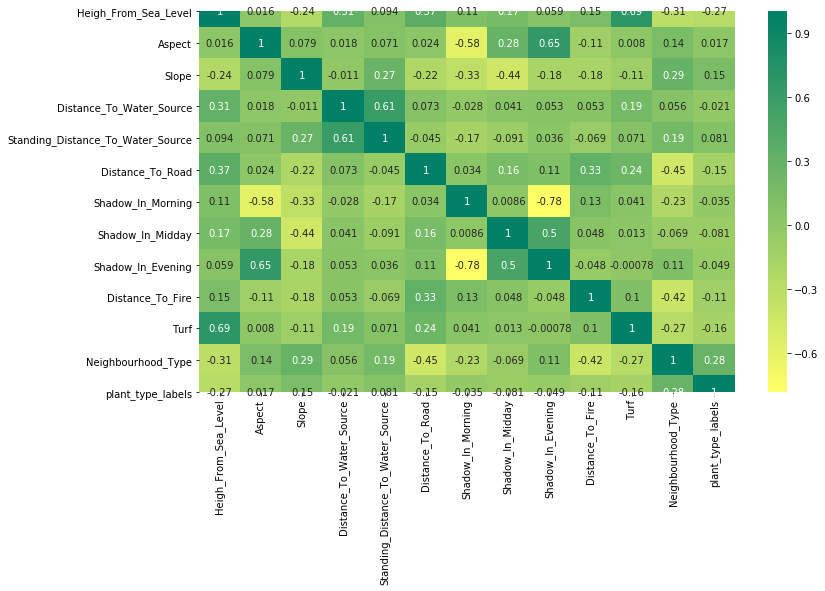

In [29]:
# Plotting heatmap for better visualization
fig = plt.subplots(figsize=(12,7))
sns.heatmap(corr, cmap="summer_r", annot=True)

Dark shades represents positive correlation while lighter shades represents negative correlation.


In [30]:
corr_target = df.drop("plant_type_labels", axis=1).apply(lambda x: x.corr(df.plant_type_labels))
corr_target.sort_values(ascending = False)

Neighbourhood_Type                   0.275833
Slope                                0.148425
Standing_Distance_To_Water_Source    0.081231
Aspect                               0.016693
Distance_To_Water_Source            -0.020926
Shadow_In_Morning                   -0.034811
Shadow_In_Evening                   -0.048911
Shadow_In_Midday                    -0.080535
Distance_To_Fire                    -0.108442
Distance_To_Road                    -0.152594
Turf                                -0.163814
Heigh_From_Sea_Level                -0.269510
dtype: float64

From the above correlation values we can say that plant_type is higly correlated with Neighborhood_type, slope, Standing_Distance_To_Water_Source and aspect.

Text(0.5, 1.0, 'Relevant features of Plant_Type')

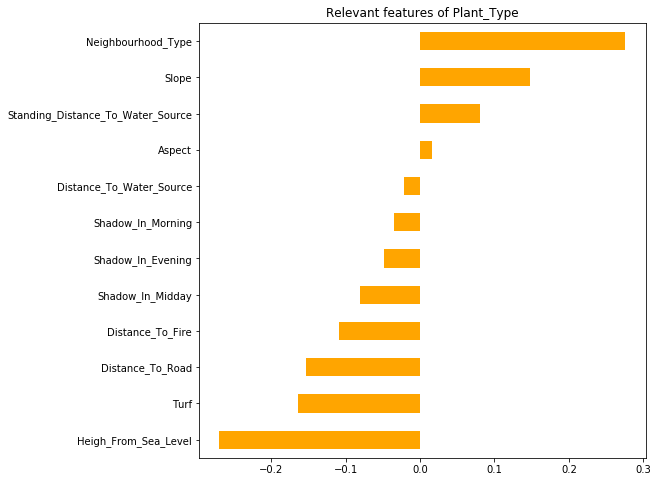

In [31]:
# Plotting correlation between all variables and target variable

plt.rcParams['figure.figsize'] = (8, 8)
corr_target.sort_values().plot(kind = "barh", color = 'orange')
plt.title("Relevant features of Plant_Type")

## 2A) Handling outliers ( imputation,Removal )

### Let's find out the outliers

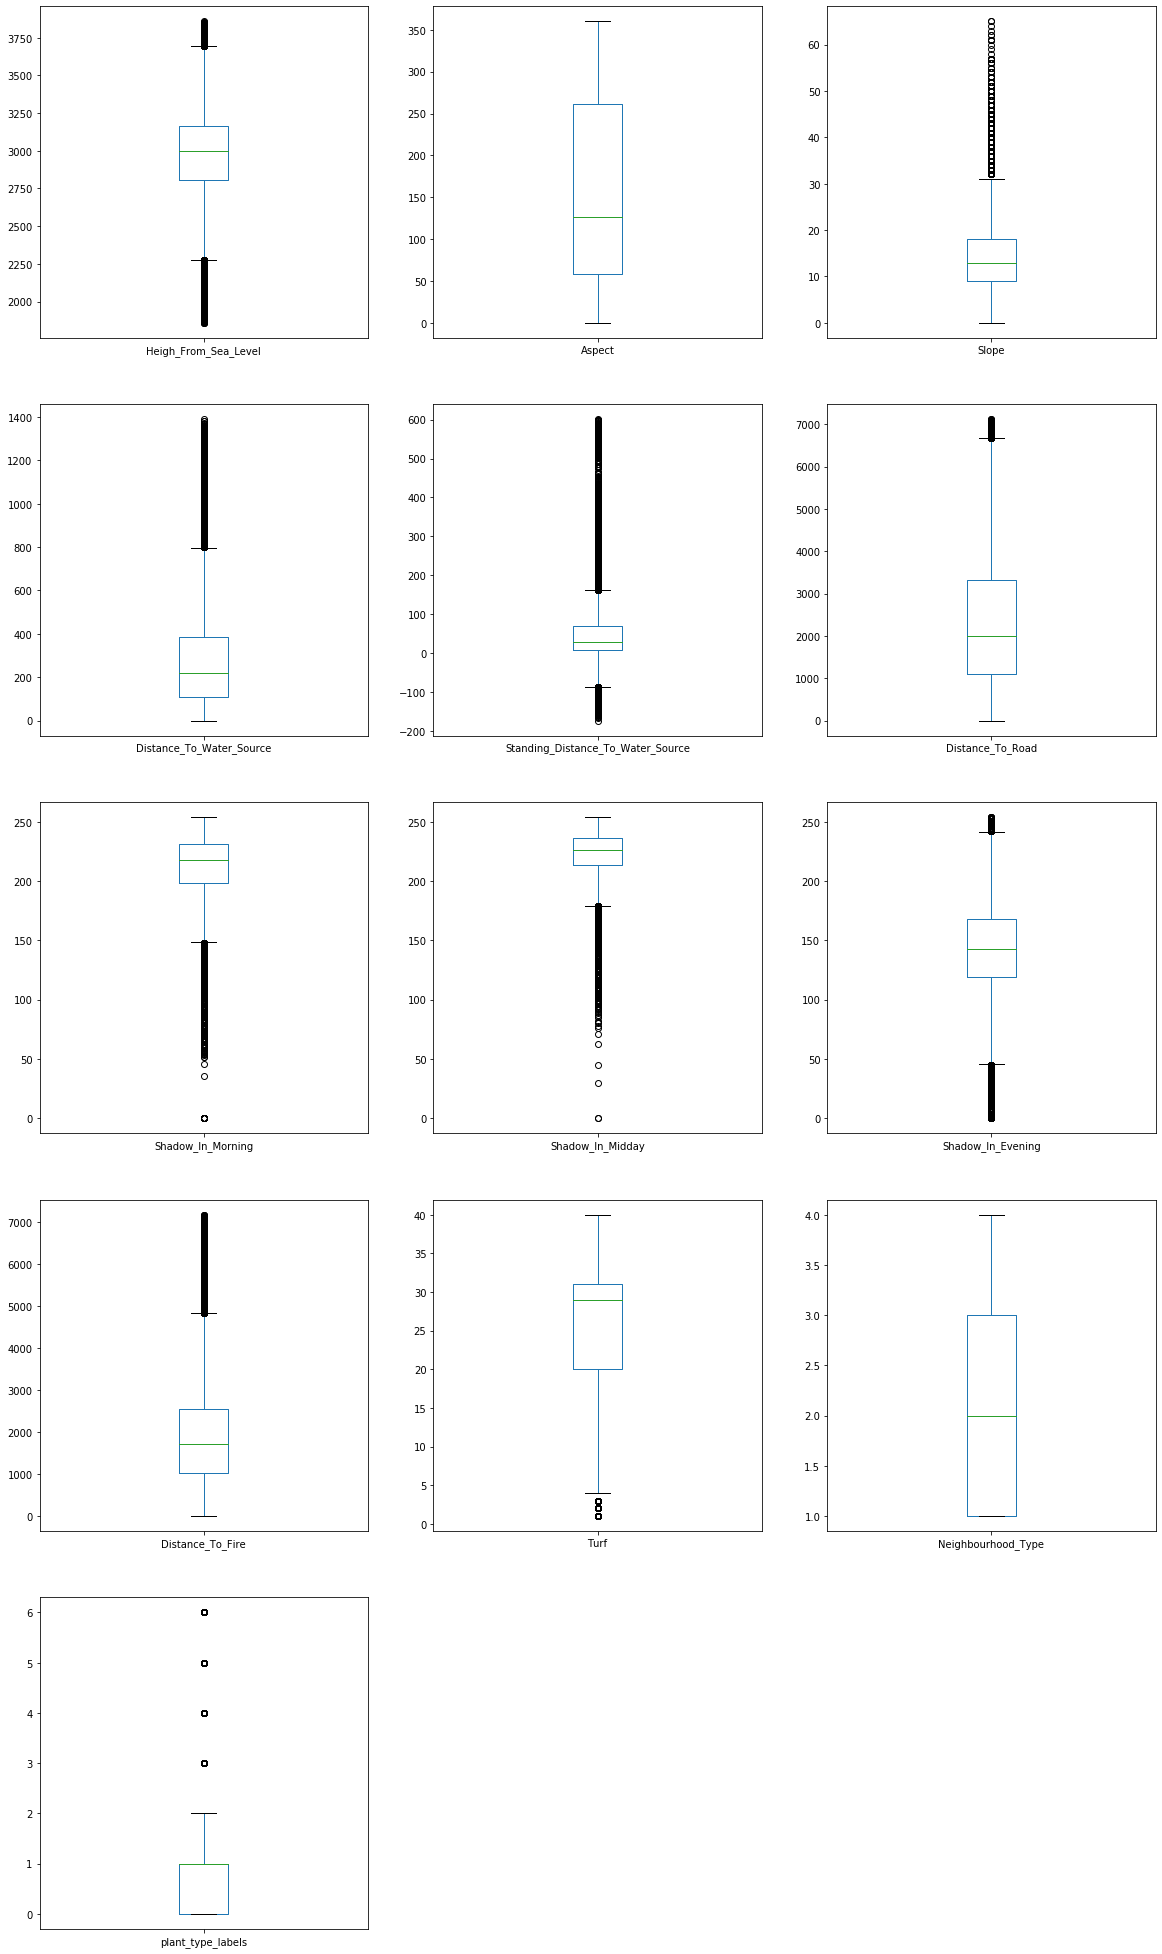

In [32]:
df.plot(kind='box', subplots=True, layout=(7,3), sharex=False, sharey=False, figsize=(20,50))
plt.show()

As we can see from the above boxplots there are some outliers in our dataset. Let's cap the outliers because if we use IQR method then we will be removing so many values from the data which we don't want. A value is identified as outlier if it exceeds the value of the 99th percentile of the variable by some factor, or if it is below the 1st percentile of given values by some factor.The outlier is then capped at a certain value above the P99 value or floored at a factor below the P1 value.

In [33]:
# Capping
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

Outliers has been capped. Now, we can train our model. We don't need to apply one hot encoder as our columns are not in categorical variables.

## 3&4) Data Engineering  and Data Preparation for Modeling

In [34]:
# Assigning X and y for modeling 

X = df.drop('plant_type_labels', axis=1) 
y = df.plant_type_labels

In [35]:
X.head(3)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1
1,3021,283,31,630,250,2155,127,224.0,226,1519,13,3
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3


In [36]:
y.head(3)

0    1
1    1
2    0
Name: plant_type_labels, dtype: int32

In [37]:
# Splitting X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


## 5) Classification Model Prediction with Hyperparameter Tuning

### Mode 1 -  K-nearest neighbor classifier 

In [38]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights':['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv= 3, n_jobs = -1)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.4min finished


In [39]:
gs_results.best_score_

0.9585176388243462

In [40]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [41]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [43]:
best_estimator_knn = gs_results.best_estimator_

In [45]:
from sklearn.metrics import accuracy_score
best_pred_y_knn = best_estimator_knn.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y_knn)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y_knn)))

Accuracy: 96.60249735376884%
Confusion Matrix:
[[40718  1308     1     0    20     1    93]
 [ 1245 55337    91     0   138    68    23]
 [    1   105  6865    33    14   151     0]
 [    0     0    59   440     0    23     0]
 [   17   164    18     0  1711     5     1]
 [    4    57   136    12     6  3245     0]
 [  137    17     0     0     0     0  3939]]


In [46]:
print(classification_report(y_test, best_pred_y_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42141
           1       0.97      0.97      0.97     56902
           2       0.96      0.96      0.96      7169
           3       0.91      0.84      0.87       522
           4       0.91      0.89      0.90      1916
           5       0.93      0.94      0.93      3460
           6       0.97      0.96      0.97      4093

    accuracy                           0.97    116203
   macro avg       0.94      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



### Model 2 -  Random Forest Classifier 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [48]:
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [49]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5, n_jobs = -1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'cr

In [50]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [51]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
CV_rfc.best_score_

0.7531396476251125

In [53]:
best_estimator_rf = CV_rfc.best_estimator_

In [54]:
from sklearn.metrics import accuracy_score
best_pred_y_rf = best_estimator_rf.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y_rf)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y_rf)))

Accuracy: 75.3405677994544%
Confusion Matrix:
[[31316 10506     8     0     1     0   310]
 [ 9950 46272   544     0    24    70    42]
 [    0   747  6284    26     0   112     0]
 [    0     0   289   229     0     4     0]
 [    0  1638    54     0   224     0     0]
 [    0  1068  1767    15     0   610     0]
 [ 1460    20     0     0     0     0  2613]]


In [55]:
print(classification_report(y_test, best_pred_y_rf))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     42141
           1       0.77      0.81      0.79     56902
           2       0.70      0.88      0.78      7169
           3       0.85      0.44      0.58       522
           4       0.90      0.12      0.21      1916
           5       0.77      0.18      0.29      3460
           6       0.88      0.64      0.74      4093

    accuracy                           0.75    116203
   macro avg       0.80      0.54      0.59    116203
weighted avg       0.76      0.75      0.74    116203



### Model 3 -  Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

params_dtree = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dtree, verbose=1, cv=3, n_jobs = -1)

grid_search_cv_dtree.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed: 12.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 

In [57]:
grid_search_cv_dtree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [58]:
grid_search_cv_dtree.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [59]:
grid_search_cv_dtree.best_score_

0.752382345685387

In [60]:
best_estimator_dtree = grid_search_cv_dtree.best_estimator_

In [61]:
best_pred_y_dtree = best_estimator_dtree.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y_dtree)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y_dtree)))

Accuracy: 75.5359155959829%
Confusion Matrix:
[[29964 11539    27     0     2     0   609]
 [ 7959 48232   427    10    47   180    47]
 [    0   964  5693   144     0   368     0]
 [    0     1   323   195     0     3     0]
 [   66  1561    42     0   247     0     0]
 [    4  1133  1576    88     7   652     0]
 [ 1251    50     0     0     0     0  2792]]


In [62]:
# creating a confusion matrix 
cm_dtree = confusion_matrix(y_test, best_pred_y_dtree)
cm_dtree

array([[29964, 11539,    27,     0,     2,     0,   609],
       [ 7959, 48232,   427,    10,    47,   180,    47],
       [    0,   964,  5693,   144,     0,   368,     0],
       [    0,     1,   323,   195,     0,     3,     0],
       [   66,  1561,    42,     0,   247,     0,     0],
       [    4,  1133,  1576,    88,     7,   652,     0],
       [ 1251,    50,     0,     0,     0,     0,  2792]], dtype=int64)

In [63]:
print(classification_report(y_test, best_pred_y_dtree))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     42141
           1       0.76      0.85      0.80     56902
           2       0.70      0.79      0.75      7169
           3       0.45      0.37      0.41       522
           4       0.82      0.13      0.22      1916
           5       0.54      0.19      0.28      3460
           6       0.81      0.68      0.74      4093

    accuracy                           0.76    116203
   macro avg       0.69      0.53      0.56    116203
weighted avg       0.75      0.76      0.75    116203



### Let's test our model accuracies on test data

In [67]:
test = pd.read_csv("capstone_test.csv")

In [68]:
test.head(3)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine


In [69]:
test['Shadow_In_Midday'] = test.Shadow_In_Midday.interpolate(method ='linear')
print(test.isna().sum())

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64


For predicting classes on unseen data we will be using Test data but for the comparison we need to use label encoder in test data as well for plant_type column.


In [70]:
# Assigning numerical values and storing in another column
labelencoder_test = LabelEncoder()

test['plant_type_labels'] = labelencoder_test.fit_transform(test['Plant_Type'])
test.head(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type,plant_type_labels
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid,0
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine,1
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine,1
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,Assassin vine,1
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,Ascomoid,0


In [71]:
# If we want to know what labels are addressed to what plant_type

label_name_mapping_test = dict(zip(labelencoder_test.classes_, labelencoder_test.transform(labelencoder_test.classes_)))
print(label_name_mapping_test)

{'Ascomoid': 0, 'Assassin vine': 1, 'Basidirond': 2, 'Dark tree': 3, 'Hangman tree': 4, 'Kelpie': 5, 'Myconid:': 6}


Same labels has been applied on test data as train data. We can compare our results easily.

In [72]:
new_test = test.drop(['Plant_Type'], axis = 1)
new_test.head(2)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,plant_type_labels
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,0
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,1


In [93]:
X1 = new_test.drop('plant_type_labels', axis=1) 
y1 = new_test.plant_type_labels

In [94]:
# Checking with KNN model

best_pred_y1_knn = best_estimator_knn.predict(X1)
print("Accuracy: {}%".format(accuracy_score(y1, best_pred_y1_knn)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y1, best_pred_y1_knn)))

Accuracy: 96.49578754421142%
Confusion Matrix:
[[40886  1324     3     0    25     4   111]
 [ 1296 54956    92     0   150    82    20]
 [    0    94  6992    31    11   138     0]
 [    0     1    62   468     0    32     0]
 [   17   183    23     0  1669     3     0]
 [    1    81   114    11    11  3218     0]
 [  133    19     0     0     0     0  3942]]


In [95]:
print(classification_report(y1, best_pred_y1_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42353
           1       0.97      0.97      0.97     56596
           2       0.96      0.96      0.96      7266
           3       0.92      0.83      0.87       563
           4       0.89      0.88      0.89      1895
           5       0.93      0.94      0.93      3436
           6       0.97      0.96      0.97      4094

    accuracy                           0.96    116203
   macro avg       0.94      0.93      0.94    116203
weighted avg       0.96      0.96      0.96    116203



In [111]:
#Creating a function using LabelBinarizer() in order to evaluate the AUC ROC score for our multi-class problem

def roc_auc_score_knn(y1, best_pred_y1_knn, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y1)
    y1 = lb.transform(y1)
    best_pred_y1_knn = lb.transform(best_pred_y1_knn)
    return roc_auc_score(y1, best_pred_y1_knn, average=average)

In [112]:
roc_auc_score_knn(y1, best_pred_y1_knn)

0.9609788365100906

In [96]:
# Checking with Random forest model

from sklearn.metrics import accuracy_score
best_pred_y1_rf = best_estimator_rf.predict(X1)
print("Accuracy: {}%".format(accuracy_score(y1, best_pred_y1_rf)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y1, best_pred_y1_rf)))

Accuracy: 75.11510029861536%
Confusion Matrix:
[[31340 10680    11     0     2     0   320]
 [10027 45849   573     2    23    74    48]
 [    0   728  6407    42     0    89     0]
 [    0     0   314   241     0     8     0]
 [    1  1605    64     0   225     0     0]
 [    0  1014  1804    11     0   607     0]
 [ 1466    11     0     0     0     0  2617]]


In [97]:
print(classification_report(y1, best_pred_y1_rf))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     42353
           1       0.77      0.81      0.79     56596
           2       0.70      0.88      0.78      7266
           3       0.81      0.43      0.56       563
           4       0.90      0.12      0.21      1895
           5       0.78      0.18      0.29      3436
           6       0.88      0.64      0.74      4094

    accuracy                           0.75    116203
   macro avg       0.80      0.54      0.59    116203
weighted avg       0.76      0.75      0.74    116203



In [113]:
# Creating a function using LabelBinarizer() in order to evaluate the AUC ROC score for our multi-class problem
def roc_auc_score_rf(y1, best_pred_y1_rf, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y1)
    y1 = lb.transform(y1)
    best_pred_y1_rf = lb.transform(best_pred_y1_rf)
    return roc_auc_score(y1, best_pred_y1_rf, average=average)

In [114]:
roc_auc_score_rf(y1, best_pred_y1_rf)

0.740893640303189

In [98]:
# Checking with Decision Tree

best_pred_y1_dtree = best_estimator_dtree.predict(X1)
print("Accuracy: {}%".format(accuracy_score(y1, best_pred_y1_dtree)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y1, best_pred_y1_dtree)))

Accuracy: 75.47051280947996%
Confusion Matrix:
[[30101 11638    27     0     6     1   580]
 [ 7916 47965   424    14    42   186    49]
 [    0  1002  5745   158     0   361     0]
 [    0     0   340   216     0     7     0]
 [   84  1522    51     0   238     0     0]
 [   12  1105  1603    89     3   624     0]
 [ 1233    51     0     0     0     0  2810]]


In [99]:
print(classification_report(y1, best_pred_y1_dtree))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     42353
           1       0.76      0.85      0.80     56596
           2       0.70      0.79      0.74      7266
           3       0.45      0.38      0.42       563
           4       0.82      0.13      0.22      1895
           5       0.53      0.18      0.27      3436
           6       0.82      0.69      0.75      4094

    accuracy                           0.75    116203
   macro avg       0.69      0.53      0.56    116203
weighted avg       0.75      0.75      0.74    116203



In [115]:
#Creating a function using LabelBinarizer() in order to evaluate the AUC ROC score for our multi-class problem
def multiclass_roc_auc_score(y1, best_pred_y1_dtree, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y1)
    y1 = lb.transform(y1)
    best_pred_y1_dtree = lb.transform(best_pred_y1_dtree)
    return roc_auc_score(y1, best_pred_y1_dtree, average=average)

In [116]:
multiclass_roc_auc_score(y1, best_pred_y1_dtree)

0.7363046016772413

## 6) Comparison of model using performance KPIs, Training & Testing Time

After comparison of all models (KNN, RF, DTREE), we have found best model which is KNN. According to the accuracy, precision, recall and Roc Auc score we can say that KNN model performance is best with 96% accuracy. Also, training and testing time of KNN model is also better than other models.

So, our best model is KNN model.

## 7) Final predictive model recommendation

I would recommend KNN model for final Predictive model with best grid search parameters.

### Create key segments for all the plants (train + test) based on the average sunlight received throughout the day and their distance from waterbody to identify which segments of plants are getting enough sunlight and water vs which ones are not. This will help in mobilizing resources to track growth of trees appropriately 

In [117]:
df.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'plant_type_labels'],
      dtype='object')

Approach: Creating two clusters as shown below;

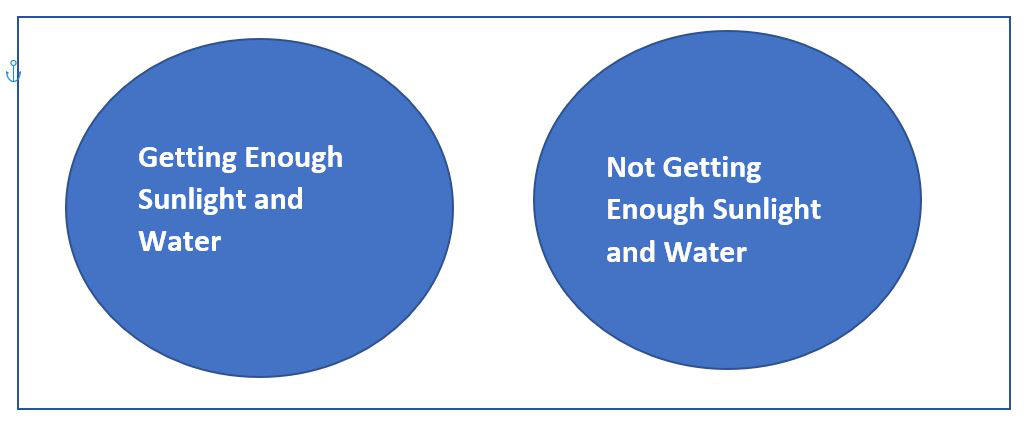

In [121]:
from PIL import Image
cluster_image = Image.open("Capture.jpg");
cluster_image

In [136]:
# Concatenating training and testing data

joined_data = pd.concat([df, new_test])
joined_data.head(4)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,plant_type_labels
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,1
1,3021,283,31,630,250,2155,127,224.0,226,1519,13,3,1
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,0
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,1


In [137]:
joined_data.shape

(581012, 13)

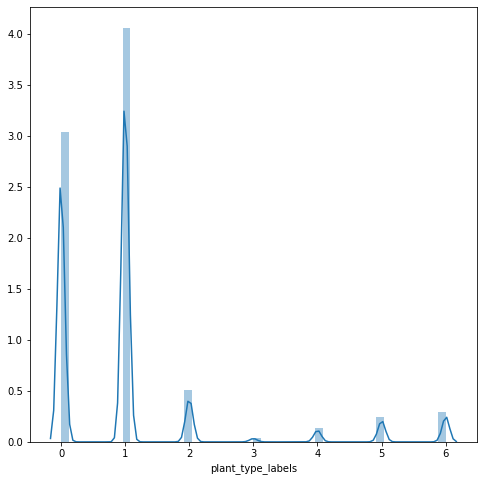

In [127]:
sns.distplot(joined_data.plant_type_labels)

In [175]:
avg = joined_data[['Shadow_In_Morning','Shadow_In_Midday','Shadow_In_Evening']]
avg.head(3)

,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening
0,235,224.0,119
1,127,224.0,226
2,232,244.0,140


In [176]:
joined_data['Average sunlight'] = avg.mean(axis=1)
joined_data.head(2)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,plant_type_labels,Average sunlight
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,1,192.666667
1,3021,283,31,630,250,2155,127,224.0,226,1519,13,3,1,192.333333


In [177]:
clustered_data = joined_data[['Average sunlight', 'Distance_To_Water_Source', 'plant_type_labels']]
clustered_data.head(3)

,Average sunlight,Distance_To_Water_Source,plant_type_labels
0,192.666667,234,1
1,192.333333,630,1
2,205.333333,618,0


In [178]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)


In [179]:
y_predicted = km.fit_predict(clustered_data)
y_predicted

array([0, 1, 1, ..., 0, 0, 0])

In [180]:
clustered_data['cluster'] = y_predicted

In [181]:
clustered_data.head(10)

,Average sunlight,Distance_To_Water_Source,plant_type_labels,cluster
0,192.666667,234,1,0
1,192.333333,630,1,1
2,205.333333,618,0,1
3,208.333333,150,1,0
4,203.666667,576,1,1
5,202.333333,379,1,1
6,209.000000,30,0,0
7,179.666667,255,0,0
8,178.000000,430,0,1
9,208.333333,108,1,0


### Cluster: 0 signifies plants are not getting enough sunlight and are far from water body


### Cluster: 1 signfies plants are getting enough sunlight and are near to water body

In [182]:
data = clustered_data.sort_values(by='cluster')

In [183]:
data.head(20)

,Average sunlight,Distance_To_Water_Source,plant_type_labels,cluster
0,192.666667,234,1,0
353656,184.166667,90,0,0
353655,162.333333,242,2,0
353654,191.833333,60,0,0
353652,193.333333,210,1,0
353651,190.000000,258,1,0
353650,207.000000,335,1,0
353649,206.666667,201,2,0
353647,187.000000,342,1,0
353646,196.333333,134,1,0


In [184]:
centroids = km.cluster_centers_
print(centroids)

[[192.27659759 156.58515071   1.08229329]
 [193.93878654 532.93048843   0.97864299]]
